## Load Dataset


In [1]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing Data
Mengatasi nilai yang hilang dan menghapus kolom yang tidak diperlukan.


In [2]:
titanic.isnull().sum()
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Data Exploration
Membantu memahami distribusi data dan mengidentifikasi pola.

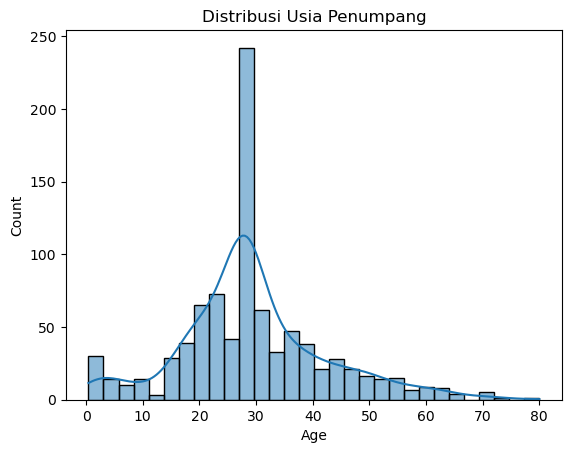

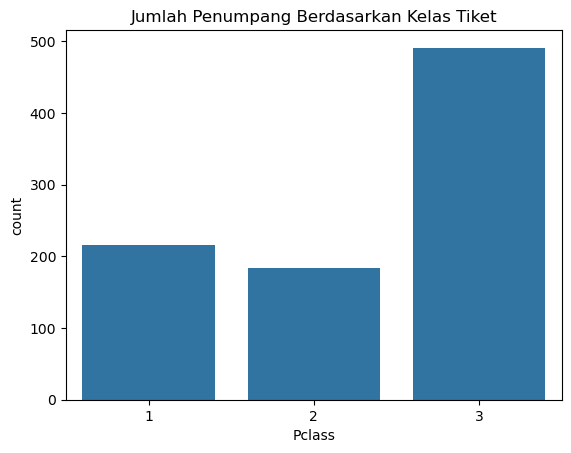

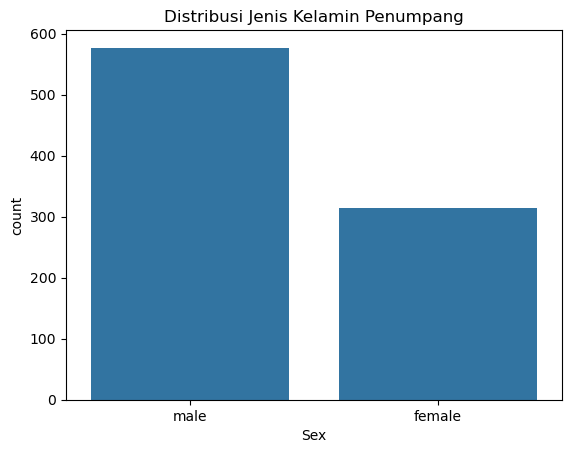

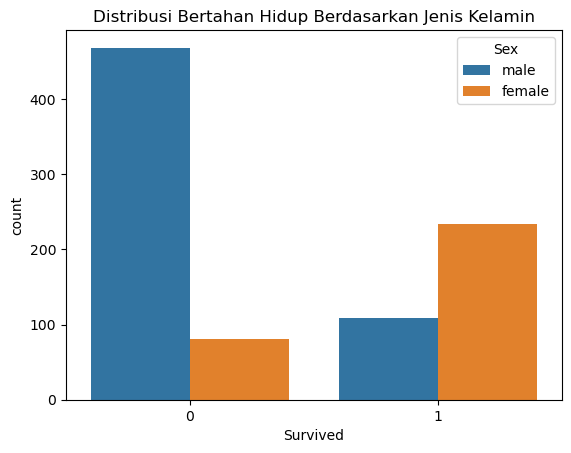

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(titanic['Age'], kde=True)
plt.title('Distribusi Usia Penumpang')
plt.show()

sns.countplot(x='Pclass', data=titanic)
plt.title('Jumlah Penumpang Berdasarkan Kelas Tiket')
plt.show()

sns.countplot(x='Sex', data=titanic)
plt.title('Distribusi Jenis Kelamin Penumpang')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Distribusi Bertahan Hidup Berdasarkan Jenis Kelamin')
plt.show()


## Modelling
Menggunakan model klasifikasi dasar untuk prediksi.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

